### List of dependencies
- networkx
- pandas
- numpy
- matplotlib

In [28]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import random
%matplotlib inline

In [29]:
df = pd.read_csv("../data/dataset.CSV", sep=";")

In [30]:
df.describe()

,female_id,male_id,date,female_grade,anal,oral,kiss
count,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000,50632.000000
mean,6674.964074,6497.960045,1561.542878,0.742692,0.300758,0.665192,0.629957
std,4599.308794,4544.051880,444.996668,0.604601,0.817198,0.696622,0.696743
min,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2813.000000,2422.250000,1238.000000,1.000000,0.000000,1.000000,1.000000
50%,6235.000000,5766.000000,1617.000000,1.000000,1.000000,1.000000,1.000000
75%,10496.000000,10111.250000,1933.000000,1.000000,1.000000,1.000000,1.000000
max,16728.000000,16729.000000,2232.000000,1.000000,1.000000,1.000000,1.000000


### We add an offset to male id in order to not have the same ids in male and female 

In [31]:
offset_male_id = max(df["female_id"]) + 10000
df["male_id"] = df["male_id"] + offset_male_id

### Ensure that values are sorted by ascending date 

In [32]:
df = df.sort_values("date")

### Let's create the graph, we are going to use Multi Graph because we may have multiple edges between the same escort and client

In [33]:
G = nx.MultiGraph()

In [34]:
list_male_id = df["male_id"].unique()
list_female_id = df["female_id"].unique()

### Be sure that there is no intersection between ids

In [35]:
len(set(list_male_id).intersection(set(list_female_id)))

0

In [36]:
print(len(list_male_id), " different clients")

10106  different clients


In [37]:
print(len(list_female_id), " different escort")

6624  different escort


In [38]:
G.add_nodes_from(list_male_id, role="client")
G.add_nodes_from(list_female_id, role="escort")

In [39]:
%%time
for index, row in df.iterrows():
    if index % 3000 == 0:
        print("Added ", index, " edges")
    G.add_edge(row["female_id"], row["male_id"])

Added  0  edges
Added  3000  edges
Added  6000  edges
Added  9000  edges
Added  12000  edges
Added  15000  edges
Added  18000  edges
Added  21000  edges
Added  24000  edges
Added  27000  edges
Added  30000  edges
Added  33000  edges
Added  36000  edges
Added  39000  edges
Added  42000  edges
Added  45000  edges
Added  48000  edges
CPU times: user 4.2 s, sys: 130 ms, total: 4.33 s
Wall time: 4.36 s


In [40]:
print(len(G.edges()), " edges in the graph")

50632  edges in the graph


In [41]:
print(len(G.nodes()), "nodes in the graph")

16730 nodes in the graph


In [61]:
test = nx.MultiGraph()
list_male_year1 = df[((df.date > 365) & (df.date < 730))]["male_id"].unique()
list_female_year1 = df[((df.date > 365) & (df.date < 730))]["female_id"].unique()

test.add_nodes_from(list_male_year1, role="client")
test.add_nodes_from(list_female_year1, role="escort")

for index, row in df[((df.date > 365) & (df.date < 730))].iterrows():
    if index % 3000 == 0:
        print("Added ", index, " edges")
    test.add_edge(row["female_id"], row["male_id"])
    
colors = []
for node, data in test.nodes_iter(data=True):
    if data["role"] == "client":
        colors.append("b")
    else:
        colors.append("r")

/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hol

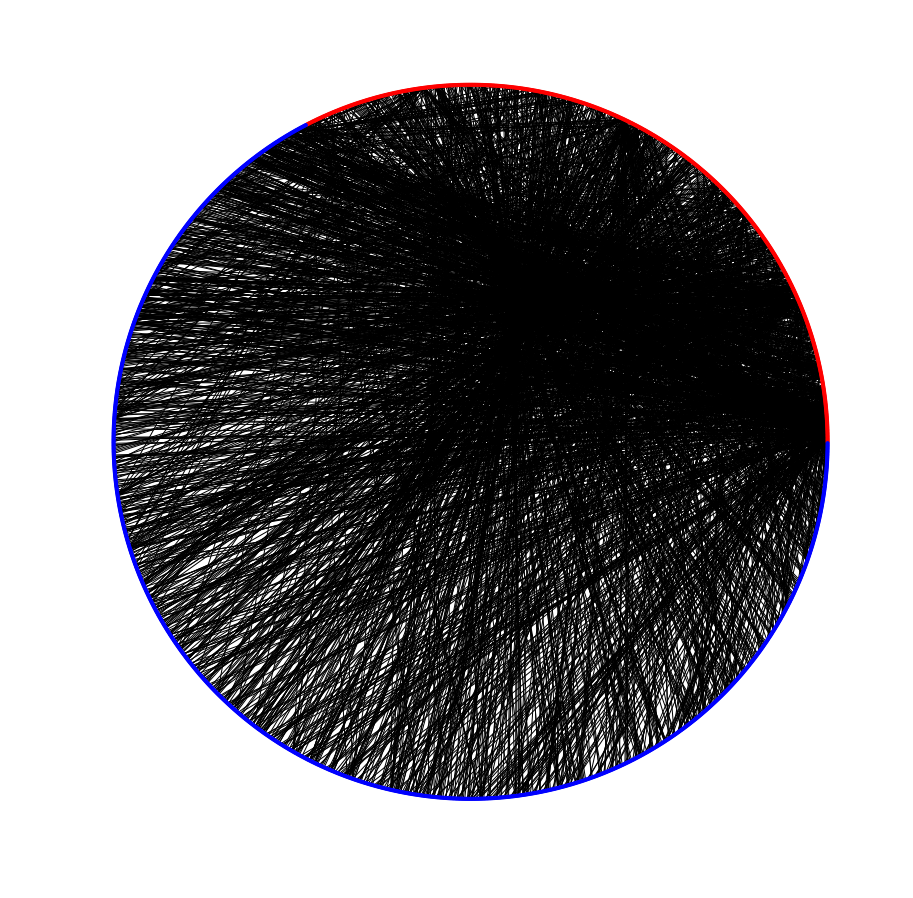

In [62]:
plt.figure(figsize=(12,12))
nx.draw_shell(test, node_size=10, node_color = colors)

Assez peu lisible ici.

Essayons d'utiliser une autre librairie.

In [65]:
nx.write_graphml(G, path = "lol.xml")

/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/benoitchoffin/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hol

CPU times: user 3.22 s, sys: 18.7 ms, total: 3.23 s
Wall time: 3.25 s


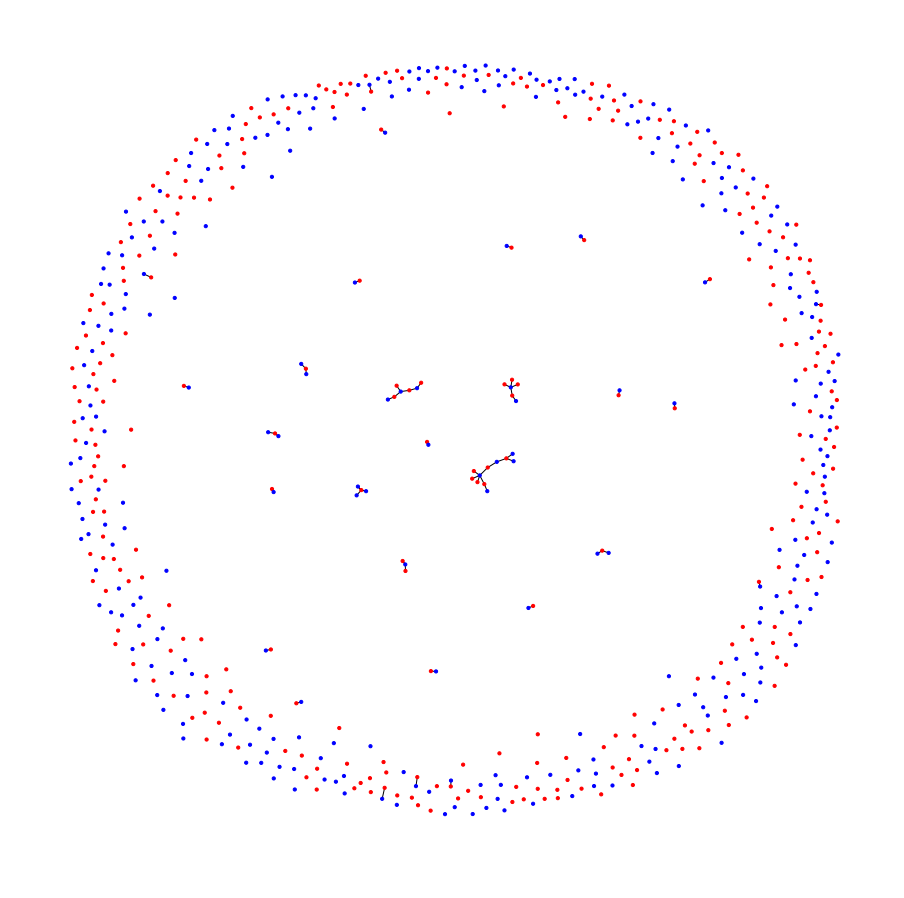

In [46]:
%%time

n_male = 300
n_female = 300
node_sample = random.sample(population=list(list_female_id), k=n_female)
node_sample = node_sample + random.sample(population=list(list_male_id), k=n_male)

subgraph = G.subgraph(node_sample)

colors = []
for node, data in subgraph.nodes_iter(data=True):
    if data["role"] == "client":
        colors.append("b")
    else:
        colors.append("r")
    
    
plt.figure(figsize=(12,12))
nx.draw_spring(subgraph, node_color=colors, node_size=10)

CPU times: user 2min 34s, sys: 224 ms, total: 2min 35s
Wall time: 2min 35s


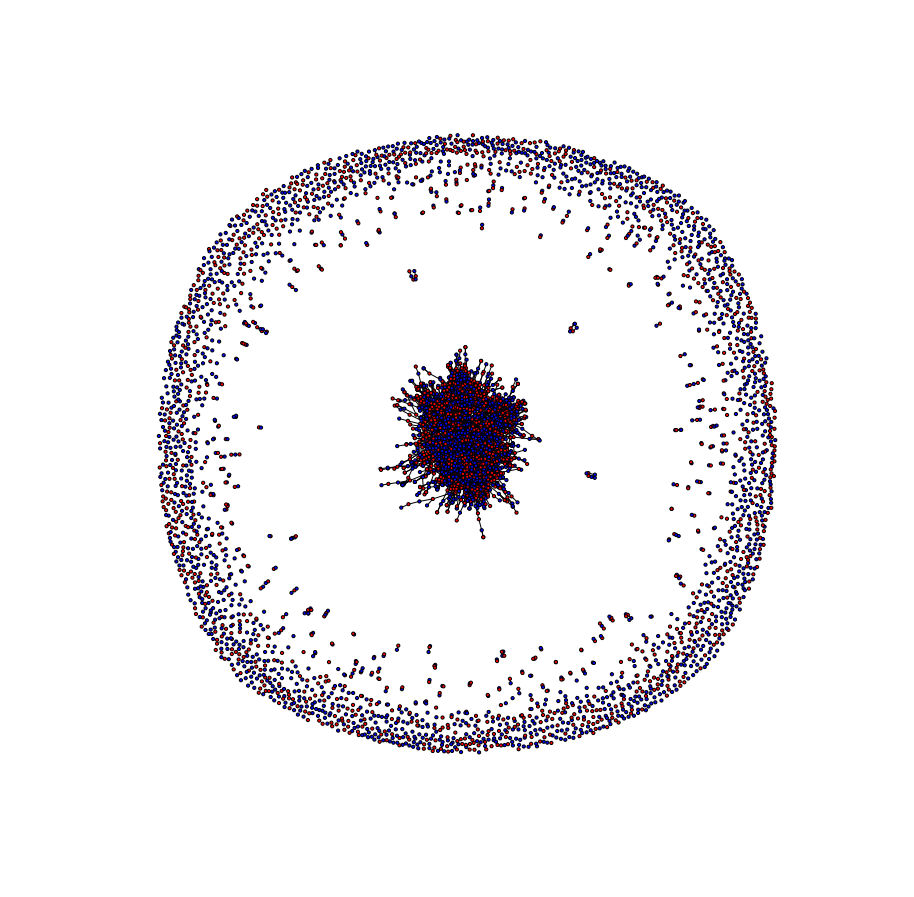

In [69]:
%%time


n_nodes = 8000
full_node_list = list(list_female_id) + list(list_male_id)
node_sample = random.sample(population=full_node_list, k=n_nodes)
subgraph = G.subgraph(node_sample)

colors = []
for node, data in subgraph.nodes_iter(data=True):
    if data["role"] == "client":
        colors.append("b")
    else:
        colors.append("r")
    
    
plt.figure(figsize=(12,12))
nx.draw_spring(subgraph, node_color=colors, node_size=10)



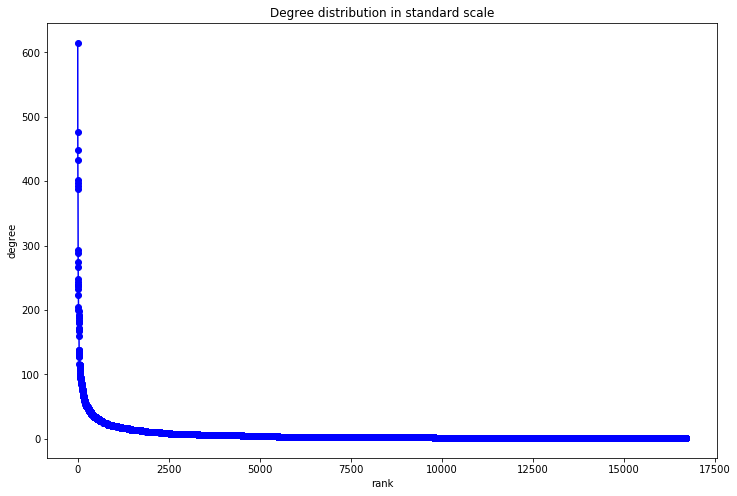

In [21]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) 
dmax=max(degree_sequence)
plt.figure(figsize=(12,8))
plt.plot(degree_sequence,'b-',marker='o')
plt.title("Degree distribution in standard scale")
plt.ylabel("degree")
plt.xlabel("rank")

In [ ]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) 
dmax=max(degree_sequence)
plt.figure(figsize=(12,8))
plt.plot(degree_sequence,'b-',marker='o')
plt.title("Degree distribution in standard scale")
plt.ylabel("degree")
plt.xlabel("rank")

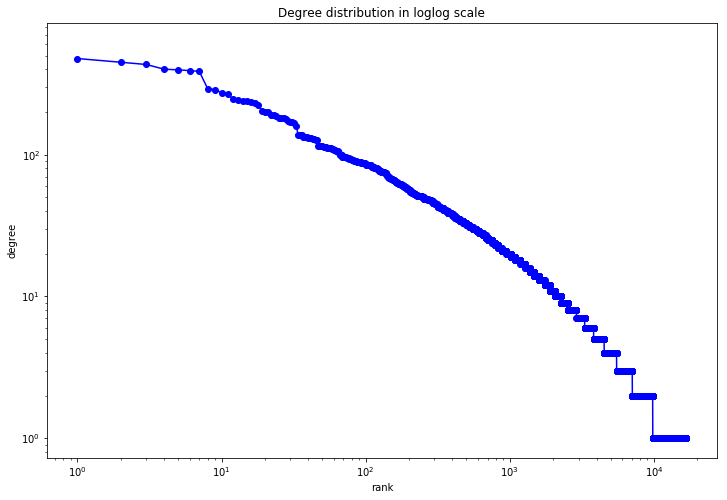

In [17]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) 
dmax=max(degree_sequence)
plt.figure(figsize=(12,8))
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree distribution in loglog scale")
plt.ylabel("degree")
plt.xlabel("rank")

TODO : find a way to plot dynamically the graph.